In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diminos_data.csv')
df.head()

print("Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nMissing values:")
df.isnull().sum()

Shape: (15000, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB

Missing values:


order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [2]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df['delivery_time_min'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60
df['order_hour'] = df['order_placed_at'].dt.hour
df['order_day'] = df['order_placed_at'].dt.day_name()

df.head()
df['delivery_time_min'].describe()

p95 = np.percentile(df['delivery_time_min'], 95)
print("95th Percentile Delivery Time:", p95)
outliers = df[df['delivery_time_min'] > 60]
print("Orders > 60 minutes:", outliers.shape[0])


95th Percentile Delivery Time: 27.261043996666658
Orders > 60 minutes: 170


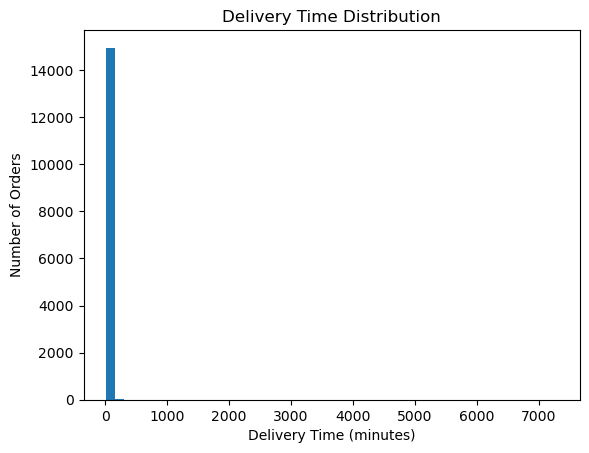

In [3]:
plt.figure()
plt.hist(df['delivery_time_min'], bins=50)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution")
plt.show()

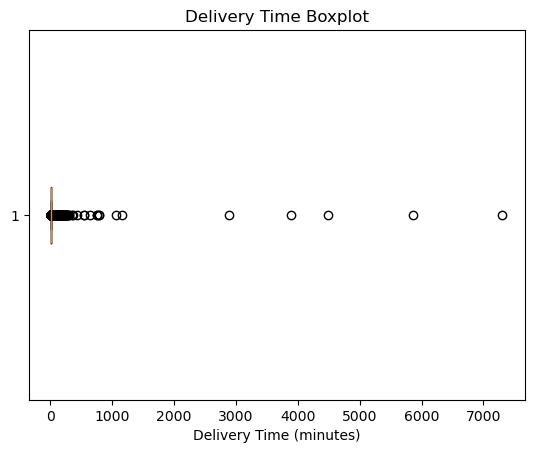

In [4]:
plt.figure()
plt.boxplot(df['delivery_time_min'], vert=False)
plt.xlabel("Delivery Time (minutes)")
plt.title("Delivery Time Boxplot")
plt.show()


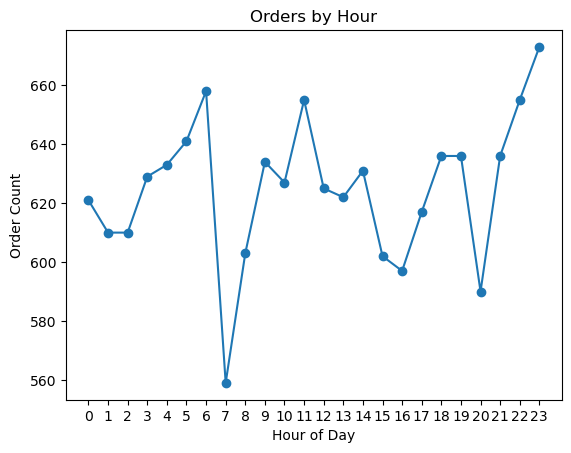

In [5]:
hourly_orders = df['order_hour'].value_counts().sort_index()
plt.figure()
plt.plot(hourly_orders.index, hourly_orders.values, marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Order Count")
plt.title("Orders by Hour")
plt.xticks(range(0,24))
plt.show()


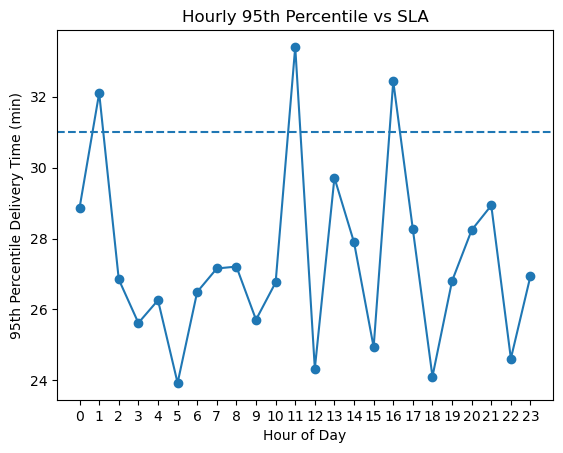

In [6]:
hourly_p95 = df.groupby('order_hour')['delivery_time_min'].quantile(0.95)
plt.figure()
plt.plot(hourly_p95.index, hourly_p95.values, marker='o')
plt.axhline(31, linestyle='--')
plt.xlabel("Hour of Day")
plt.ylabel("95th Percentile Delivery Time (min)")
plt.title("Hourly 95th Percentile vs SLA")
plt.xticks(range(0,24))
plt.show()

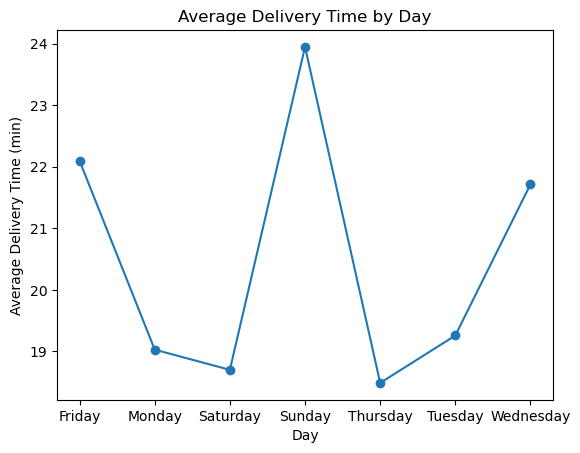

In [7]:
day_avg = df.groupby('order_day')['delivery_time_min'].mean()
plt.figure()
plt.plot(day_avg.index, day_avg.values, marker='o')
plt.xlabel("Day")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time by Day")
plt.show()


In [8]:
df['sla_breach'] = df['delivery_time_min'] > 31
sla_breach_rate = df['sla_breach'].mean() * 100
print("SLA Breach Percentage:", sla_breach_rate)
df.sort_values('delivery_time_min', ascending=False).head(10)[['order_id', 'delivery_time_min', 'order_hour']]

SLA Breach Percentage: 3.713333333333333


,order_id,delivery_time_min,order_hour
5499,1528610,7299.831375,17
4165,1527276,5867.434753,9
10225,1533336,4485.891210,11
14155,1537266,3888.444088,9
10007,1533118,2883.124250,0
11944,1535055,1152.794242,12
1361,1524472,1066.822812,10
5109,1528220,788.653022,1
117,1523228,787.800782,4
1910,1525021,758.975160,10
